**Desafio 01: Refaça as manipulações feitas em aulas e gaste um tempo analisando os dados e entendendo os efeitos das manipulações**

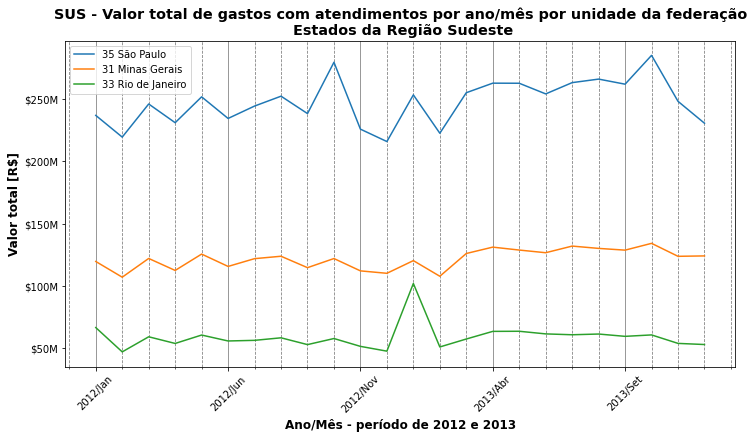

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

dados = pd.read_csv("/content/A213524189_28_143_208.csv", encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=12, 
                    thousands=".", decimal=",", engine='python')

colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")
usaveis = usaveis.drop("Total", axis=1)

#retira pico máximo para ajustar a escala
pico = usaveis.loc['35 São Paulo'].idxmax()
usaveis = usaveis.drop(pico,axis=1)

#dados de 2012 a 2013
usaveis_2012_2013 = usaveis[['2012/Jan', '2012/Fev', '2012/Mar', '2012/Abr', '2012/Mai', '2012/Jun', '2012/Jul', '2012/Ago', '2012/Set', '2012/Out', '2012/Nov', '2012/Dez',
 '2013/Jan', '2013/Fev', '2013/Mar', '2013/Abr', '2013/Mai', '2013/Jun', '2013/Jul', '2013/Ago', '2013/Set', '2013/Out', '2013/Nov', '2013/Dez',]]

#Sudeste
sudeste = usaveis_2012_2013.T[["35 São Paulo","31 Minas Gerais","33 Rio de Janeiro"]]

ax = sudeste.plot(figsize=(12,6))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}M'.format(x/1000000)))
#ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.tick_params(axis='x', labelrotation=45)
ax.grid(b=True, which='minor', axis='x', color='grey', linestyle='--')
ax.grid(b=True, which='major', axis='x', color='grey', linestyle='-')

plt.legend(loc="upper left")
plt.title('SUS - Valor total de gastos com atendimentos por ano/mês por unidade da federação', weight='bold', fontsize='x-large' )
plt.xlabel("Ano/Mês - período de 2012 e 2013",weight='bold',fontsize='large')
plt.ylabel("Valor total [R$]",weight='bold',fontsize='large')

plt.show()

**No gráfico acima vemos duas manipulações, a apresentação de um período menor de dados e o uso da escala automática não começando em zero.**

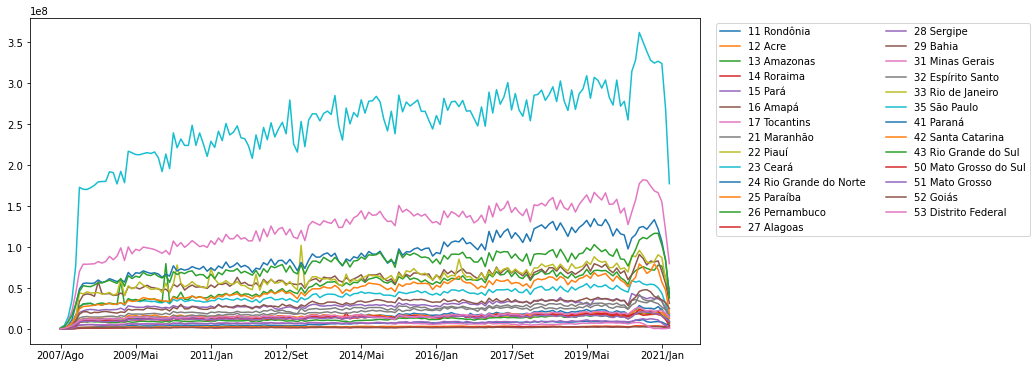

In [7]:
usaveis.T.plot(figsize=(12,6))
plt.legend(loc="upper right", ncol=2, bbox_to_anchor=(1.5, 1))

**No gráfio acima temos todo o período analisado e a escala a partir do zero.**

**Análise: Ao fazer o recorte de um intervalo das informações, como por exemplo o período de 2012-2013 previsamente estudado, notamos que algumas informações se perdem, como a constatação da tendênica de crecimento a longo prazo.**
**A escala automática também causa distorção ao permitir uma interpretação errônea da ordem de gastos de São Paulo em relação aos demais estados.**